<a href="https://colab.research.google.com/github/olusegunajibola/TMDb_Movie_Data/blob/main/TMDb_Movie_Data_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction


The Movie Database [(TMDB)](https://www.themoviedb.org/) is a popular, user editable database for movies and TV shows. When we watch a film, we're not just being entertained: We are also admiring something beautiful; learning about the world and ourselves; connecting with communities; and contributing to positive social change. As a result, producers/directors/actors put a lot of hardwork into ensuring that movies get that consistent formula to generate revenue.


The dataset we shall be analyzing in this project was derived from Kaggle's [TMDB Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). It contains information 
about 11,000 movies collected from TMDb, 
including user ratings and revenue. In particular, the final two columns ending 
with `_adj` show the budget and 
revenue of the associated movie 
in terms of 2010 dollars, 
accounting for inflation over 
time. 

In this analysis, we shall be focusing on the financial variables (alongside other variables) that has been adjusted for inflation instead of the unadjusted ones. This enables the financial variables to have a common base.

### Research Questions
For the rest of this report, we take  `revenue_adj` as our dependent variable and go through the dataset looking for likely independent variables.

Furthermore, we shall answer the following questions in our analysis:
* In what year were movies released most? And what are the revenue generated?
* In what year were each genre of movie released the most?
*   Which genres are most popular from year to year?
* Is `popularity` and `vote_average` any way related? Does high `popularity` imply high `vote_average`?
* Does the number of production company/director producing a movie have an impact on
        i. the user rating,
        ii. the revenue generated.
We are trying to see if the proverbial "_two heads are better than one kind_ statement work here.
*   What kinds of properties are associated with movies that have high revenues?
* We perform  simple linear regression that helps us to predict the adjusted revenue using `stats_model`.

In [120]:
import calendar

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

print(plt.style.available)

mpl.style.use(['seaborn'])

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.facecolor'] = "0.92"
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15


# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=15)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [121]:
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [122]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [124]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



### Data Cleaning 

In [125]:
sum(df.duplicated())

1

In [126]:
df[df.duplicated( keep = False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


We drop the duplicated row above. 

In [127]:
df = df.drop([2090])
df.loc[2088:2091, : ]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2088,43931,tt0872230,0.597254,25000000,19829957,My Soul to Take,Max Thieriot|John Magaro|Denzel Whitaker|Zena ...,NaN,Wes Craven,Only One Has The Power To Save Their Souls,soul|serial killer|slasher|teenager,A serial killer returns to his hometown to sta...,107,Drama|Horror|Mystery|Thriller,Relativity Media|Rogue,10/8/10,75,5.2,2010,25000000.0,19829957.0
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,president|history|conspiracy|lawyer|trial,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


We are going to drop the following columns as they do not serve any interest in our analysis. 

Furthermore, we shall drop the `budget` and `revenue` columns later in our analysis.

In [128]:
df = df.drop(columns = ['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'overview'])
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the `release_date`, we create a column which identifies the monthin which a movie was released. We are trying to investigate later on if the month in which a movie is released affects the revenue the movie generates.

In [129]:
release_date = df['release_date']
month = []
for i in release_date:
    #for loop to extract the month out of release_year
    if i[1] == '/':
        month.append(i[:1])
    else:
        month.append(i[:2])

In [130]:
df['release_month'] = month
df['release_month'] = df['release_month'].astype(int)
df[['release_month']].info()
# df['release_year'].apply()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   release_month  10865 non-null  int64
dtypes: int64(1)
memory usage: 427.8 KB


In [131]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6


We now change the `release_month` into an abbreviation of the month.

In [132]:
df['release_month'] = df['release_month'].apply(lambda x: calendar.month_abbr[x])
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,May


Now we can drop the `release_date`.

In [133]:
df =  df.drop(columns = ['release_date'])
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Jun


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
 14  release_month         10865 non-null  object 
dtypes: float64(4), int6

We convert the `release_year` to string so that when we run our simple regression, it does not interfere with our results.

In [135]:
df.release_year = df.release_year.astype(str)

In [136]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,May


In [137]:
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64

In order not to lose value (or possible information) that we can extract from our data, we do not touch the null values and we only do so when we want to perform analysis that are specific to that column.

We now create a column of the number of directors

In [138]:
df['no_of_dir'] = df['director'].apply(lambda i : i if type(i) == float else len(i.split('|')) )

In [139]:
# k = []
# directors = ['Chris Pratt|Bryce', " ", 'jud', np.nan, 'John Carpenter|Tobe Hooper|Larry Sulkis']
# for i in directors:
#     if type(i) == float:
#         k.append(i)
#     else:
#         j = i.split('|')
#         k.append(len(j))
# k

We also create a column of the number of production companies and genres too.

In [140]:
df['no_of_prod_comp'] = df['production_companies'].apply(lambda i : i if type(i) == float else len(i.split('|')) )
df['no_of_genres'] = df['genres'].apply(lambda i : i if type(i) == float else len(i.split('|')) )

For the sake of aestetics and ease in the analyst readability, we move `original_title` to the first column, with `revenue_adj` in the last.

In [141]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'release_month', 'no_of_dir', 'no_of_prod_comp', 'no_of_genres'],
      dtype='object')

In [142]:
df = df[['original_title', 'cast', 'director', 'genres', 'production_companies',
       'release_month', 'release_year', 'runtime', 'vote_count',
       'vote_average', 'no_of_dir','no_of_prod_comp', 'no_of_genres', 'popularity', 'budget', 'budget_adj', 'revenue' , 'revenue_adj']]
df.head()

,original_title,cast,director,genres,production_companies,release_month,release_year,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Jun,2015,124,5562,6.5,1.0,5.0,4.0,32.985763,150000000,1.379999e+08,1513528810,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,May,2015,120,6185,7.1,1.0,2.0,4.0,28.419936,150000000,1.379999e+08,378436354,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Mar,2015,119,2480,6.3,1.0,4.0,3.0,13.112507,110000000,1.012000e+08,295238201,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,Dec,2015,136,5292,7.5,1.0,3.0,4.0,11.173104,200000000,1.839999e+08,2068178225,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,Apr,2015,137,2947,7.3,1.0,5.0,3.0,9.335014,190000000,1.747999e+08,1506249360,1.385749e+09


In [143]:
df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

When we look at the above, especially where the result is `Comedy|Drama`, we can see that there is a possibility that in our data, output for `Comedy|Drama` and `Drama|Comedy` will be considered as different entities. 

Now we arrange the columns for `genre`, `director` and `cast` so as to mitigate the possibility of the problem earlier discussed occuring.



In [144]:
f = ['Comedy|Action|Adventure|Animation|Family']
# , 'Mystery|Science Fiction|Thriller|Drama']
# f = [np.nan]

def split_n_arrange(item_):
    for i in item_:
        if type(i) == float:
            return i
        else:
            j = "|".join(sorted(i.split('|')))
            # j.sort()
    return j
    # "|".join(j)

In [145]:
split_n_arrange(f), "|".join(sorted(['c','a', 'g']))

('Action|Adventure|Animation|Comedy|Family', 'a|c|g')

In [146]:
df.head(5)

,original_title,cast,director,genres,production_companies,release_month,release_year,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Jun,2015,124,5562,6.5,1.0,5.0,4.0,32.985763,150000000,1.379999e+08,1513528810,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,May,2015,120,6185,7.1,1.0,2.0,4.0,28.419936,150000000,1.379999e+08,378436354,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Mar,2015,119,2480,6.3,1.0,4.0,3.0,13.112507,110000000,1.012000e+08,295238201,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,Dec,2015,136,5292,7.5,1.0,3.0,4.0,11.173104,200000000,1.839999e+08,2068178225,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,Apr,2015,137,2947,7.3,1.0,5.0,3.0,9.335014,190000000,1.747999e+08,1506249360,1.385749e+09


In [147]:
# the lambda function used here works like the functin split_n_arrange(item_)
df['genres'] = df['genres'].apply(lambda i : i if type(i) == float else "|".join(sorted(i.split('|'))) )
df['director'] = df['director'].apply(lambda i : i if type(i) == float else "|".join(sorted(i.split('|'))) )
df['cast'] = df['cast'].apply(lambda i : i if type(i) == float else "|".join(sorted(i.split('|'))) )
df['production_companies'] = df['production_companies'].apply(lambda i : i if type(i) == float else "|".join(sorted(i.split('|'))) )

In [148]:
df.head()

,original_title,cast,director,genres,production_companies,release_month,release_year,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,Bryce Dallas Howard|Chris Pratt|Irrfan Khan|Ni...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment|Dentsu|Fuji Television Ne...,Jun,2015,124,5562,6.5,1.0,5.0,4.0,32.985763,150000000,1.379999e+08,1513528810,1.392446e+09
1,Mad Max: Fury Road,Charlize Theron|Hugh Keays-Byrne|Josh Helman|N...,George Miller,Action|Adventure|Science Fiction|Thriller,Kennedy Miller Productions|Village Roadshow Pi...,May,2015,120,6185,7.1,1.0,2.0,4.0,28.419936,150000000,1.379999e+08,378436354,3.481613e+08
2,Insurgent,Ansel Elgort|Kate Winslet|Miles Teller|Shailen...,Robert Schwentke,Adventure|Science Fiction|Thriller,Mandeville Films|NeoReel|Red Wagon Entertainme...,Mar,2015,119,2480,6.3,1.0,4.0,3.0,13.112507,110000000,1.012000e+08,295238201,2.716190e+08
3,Star Wars: The Force Awakens,Adam Driver|Carrie Fisher|Daisy Ridley|Harriso...,J.J. Abrams,Action|Adventure|Fantasy|Science Fiction,Bad Robot|Lucasfilm|Truenorth Productions,Dec,2015,136,5292,7.5,1.0,3.0,4.0,11.173104,200000000,1.839999e+08,2068178225,1.902723e+09
4,Furious 7,Dwayne Johnson|Jason Statham|Michelle Rodrigue...,James Wan,Action|Crime|Thriller,Dentsu|Media Rights Capital|One Race Films|Ori...,Apr,2015,137,2947,7.3,1.0,5.0,3.0,9.335014,190000000,1.747999e+08,1506249360,1.385749e+09


In [149]:
df['genres'].value_counts()

Drama                             712
Comedy                            712
Comedy|Drama                      372
Comedy|Drama|Romance              350
Drama|Romance                     324
                                 ... 
Comedy|Family|Mystery|TV Movie      1
Adventure|Drama|Mystery             1
Comedy|Drama|History|Romance        1
Drama|Horror|Thriller|War           1
Comedy|Family|Mystery|Romance       1
Name: genres, Length: 1060, dtype: int64

From the two cells above, we can see that we now have **different results** from the former ones especially in terms of **`value_counts()`**.

At this point, we are done with our data cleaning. We check the characteristics of our data one more time.

In [150]:
df.nunique()

original_title          10571
cast                    10697
director                 5040
genres                   1060
production_companies     7443
release_month              12
release_year               56
runtime                   247
vote_count               1289
vote_average               72
no_of_dir                  15
no_of_prod_comp             5
no_of_genres                5
popularity              10814
budget                    557
budget_adj               2614
revenue                  4702
revenue_adj              4840
dtype: int64

Our dataset covers movies released for a total of 56 years.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   cast                  10789 non-null  object 
 2   director              10821 non-null  object 
 3   genres                10842 non-null  object 
 4   production_companies  9835 non-null   object 
 5   release_month         10865 non-null  object 
 6   release_year          10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  no_of_dir             10821 non-null  float64
 11  no_of_prod_comp       9835 non-null   float64
 12  no_of_genres          10842 non-null  float64
 13  popularity            10865 non-null  float64
 14  budget                10865 non-null  int64  
 15  budget_adj         

In [152]:
df.isna().sum()

original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_month              0
release_year               0
runtime                    0
vote_count                 0
vote_average               0
no_of_dir                 44
no_of_prod_comp         1030
no_of_genres              23
popularity                 0
budget                     0
budget_adj                 0
revenue                    0
revenue_adj                0
dtype: int64

In [153]:
df.describe()

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget,budget_adj,revenue,revenue_adj
count,10865.000000,10865.000000,10865.000000,10821.000000,9835.000000,10842.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,1.086500e+04
mean,102.071790,217.399632,5.975012,1.098882,2.361464,2.486165,0.646446,1.462429e+07,1.754989e+07,3.982690e+07,5.136900e+07
std,31.382701,575.644627,0.935138,0.663004,1.343867,1.115439,1.000231,3.091428e+07,3.430753e+07,1.170083e+08,1.446383e+08
min,0.000000,10.000000,1.500000,1.000000,1.000000,1.000000,0.000065,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,90.000000,17.000000,5.400000,1.000000,1.000000,2.000000,0.207575,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,99.000000,38.000000,6.000000,1.000000,2.000000,2.000000,0.383831,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,111.000000,146.000000,6.600000,1.000000,3.000000,3.000000,0.713857,1.500000e+07,2.085325e+07,2.400000e+07,3.370173e+07
max,900.000000,9767.000000,9.200000,36.000000,5.000000,5.000000,32.985763,4.250000e+08,4.250000e+08,2.781506e+09,2.827124e+09


From the above, we notice that for `runtime`, we have movies with `runtime` equals zero. 

In addition, we also have instances where at least half of the movies have `budget_adj` and `revenue_adj` equals zero as well (_this is also consistent with the `budget` and `revenue` columns_). This is a challenge for our analysis.

Let us explore this a bit.

 As noted [here i.e Kaggle's TMDb page](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata#:~:text=For%20example%2C%20in,the%20first%20place), we may treat zeros in the budget as missing values.

In [154]:
df.query('budget_adj == 0 & revenue_adj == 0').shape

(4701, 18)

In [155]:
df.query('budget_adj == 0 & revenue_adj == 0').shape == df.query('budget == 0 & revenue == 0').shape  

True

In [156]:
df.query('budget_adj == 0 & revenue_adj == 0').shape[0]/df.shape[0] * 100

43.26737229636448

In [157]:
print("We have that {:.2f}% of our data consists of zero (or missing) values in the 'budget_adj' and 'revenue_adj' columns.".format( df.query('budget_adj == 0 & revenue_adj == 0').shape[0]/df.shape[0] * 100 ) )

We have that 43.27% of our data consists of zero (or missing) values in the 'budget_adj' and 'revenue_adj' columns.


In [158]:
df.query('revenue_adj == 0').shape

(6016, 18)

In [159]:
df.query('revenue_adj == 0').shape == df.query('revenue == 0').shape

True

In [160]:
df.query('budget_adj == 0').shape

(5696, 18)

In [161]:
df.query('budget_adj == 0').shape == df.query('budget == 0').shape

True

In [162]:
df.query('runtime == 0').shape

(31, 18)

In [163]:
df.query('budget_adj == 0 & revenue_adj == 0 & runtime == 0').shape

(28, 18)

In [164]:
df.query('budget_adj == 0 & revenue_adj == 0 & runtime == 0').shape == df.query('budget == 0 & revenue == 0 & runtime == 0').shape

True

In [165]:
df.query('budget_adj == 0 | revenue_adj == 0 | runtime == 0').shape

(7011, 18)

In [166]:
df.query('budget_adj == 0 | revenue_adj == 0 | runtime == 0').shape == df.query('budget == 0 | revenue == 0 | runtime == 0').shape

True

The comparison we made above is to ensure that there is consistency between the adjusted financial variables (i.e `budget_adj` & `revenue_adj`) and the original variables (i.e `budget` & `revenue`). Now we can drop the `budget` and `revenue` columns.

In [167]:
df = df.drop(columns = ['budget', 'revenue'])
df.head()

,original_title,cast,director,genres,production_companies,release_month,release_year,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
0,Jurassic World,Bryce Dallas Howard|Chris Pratt|Irrfan Khan|Ni...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment|Dentsu|Fuji Television Ne...,Jun,2015,124,5562,6.5,1.0,5.0,4.0,32.985763,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Charlize Theron|Hugh Keays-Byrne|Josh Helman|N...,George Miller,Action|Adventure|Science Fiction|Thriller,Kennedy Miller Productions|Village Roadshow Pi...,May,2015,120,6185,7.1,1.0,2.0,4.0,28.419936,1.379999e+08,3.481613e+08
2,Insurgent,Ansel Elgort|Kate Winslet|Miles Teller|Shailen...,Robert Schwentke,Adventure|Science Fiction|Thriller,Mandeville Films|NeoReel|Red Wagon Entertainme...,Mar,2015,119,2480,6.3,1.0,4.0,3.0,13.112507,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Adam Driver|Carrie Fisher|Daisy Ridley|Harriso...,J.J. Abrams,Action|Adventure|Fantasy|Science Fiction,Bad Robot|Lucasfilm|Truenorth Productions,Dec,2015,136,5292,7.5,1.0,3.0,4.0,11.173104,1.839999e+08,1.902723e+09
4,Furious 7,Dwayne Johnson|Jason Statham|Michelle Rodrigue...,James Wan,Action|Crime|Thriller,Dentsu|Media Rights Capital|One Race Films|Ori...,Apr,2015,137,2947,7.3,1.0,5.0,3.0,9.335014,1.747999e+08,1.385749e+09


In [168]:
df_clean_bud_rev = df.query('budget_adj != 0 & revenue_adj != 0') # take only where all values not equal to zero for the specified columns

In [169]:
df_clean_bud_rev.shape

(3854, 16)

We can go into our analysis proper now. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [170]:
corr = df.corr()
corr

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
runtime,1.000000,0.163273,0.156813,0.029158,0.130907,0.047151,0.139032,0.221127,0.175668
vote_count,0.163273,1.000000,0.253818,0.005109,0.202987,0.124480,0.800828,0.587062,0.707941
vote_average,0.156813,0.253818,1.000000,0.020586,0.037586,-0.041823,0.209517,0.093079,0.193062
no_of_dir,0.029158,0.005109,0.020586,1.000000,-0.020900,-0.005460,0.002735,-0.001191,0.004981
no_of_prod_comp,0.130907,0.202987,0.037586,-0.020900,1.000000,0.041183,0.207749,0.227344,0.114489
no_of_genres,0.047151,0.124480,-0.041823,-0.005460,0.041183,1.000000,0.130603,0.224134,0.144916
popularity,0.139032,0.800828,0.209517,0.002735,0.207749,0.130603,1.000000,0.513555,0.609085
budget_adj,0.221127,0.587062,0.093079,-0.001191,0.227344,0.224134,0.513555,1.000000,0.646627
revenue_adj,0.175668,0.707941,0.193062,0.004981,0.114489,0.144916,0.609085,0.646627,1.000000


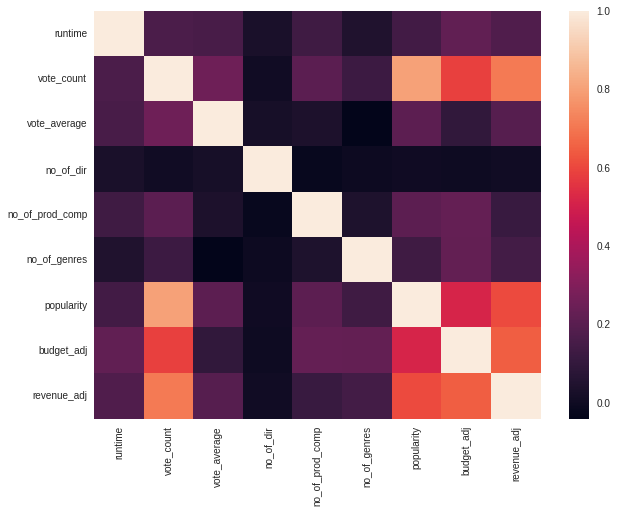

In [171]:
sns.heatmap(corr);

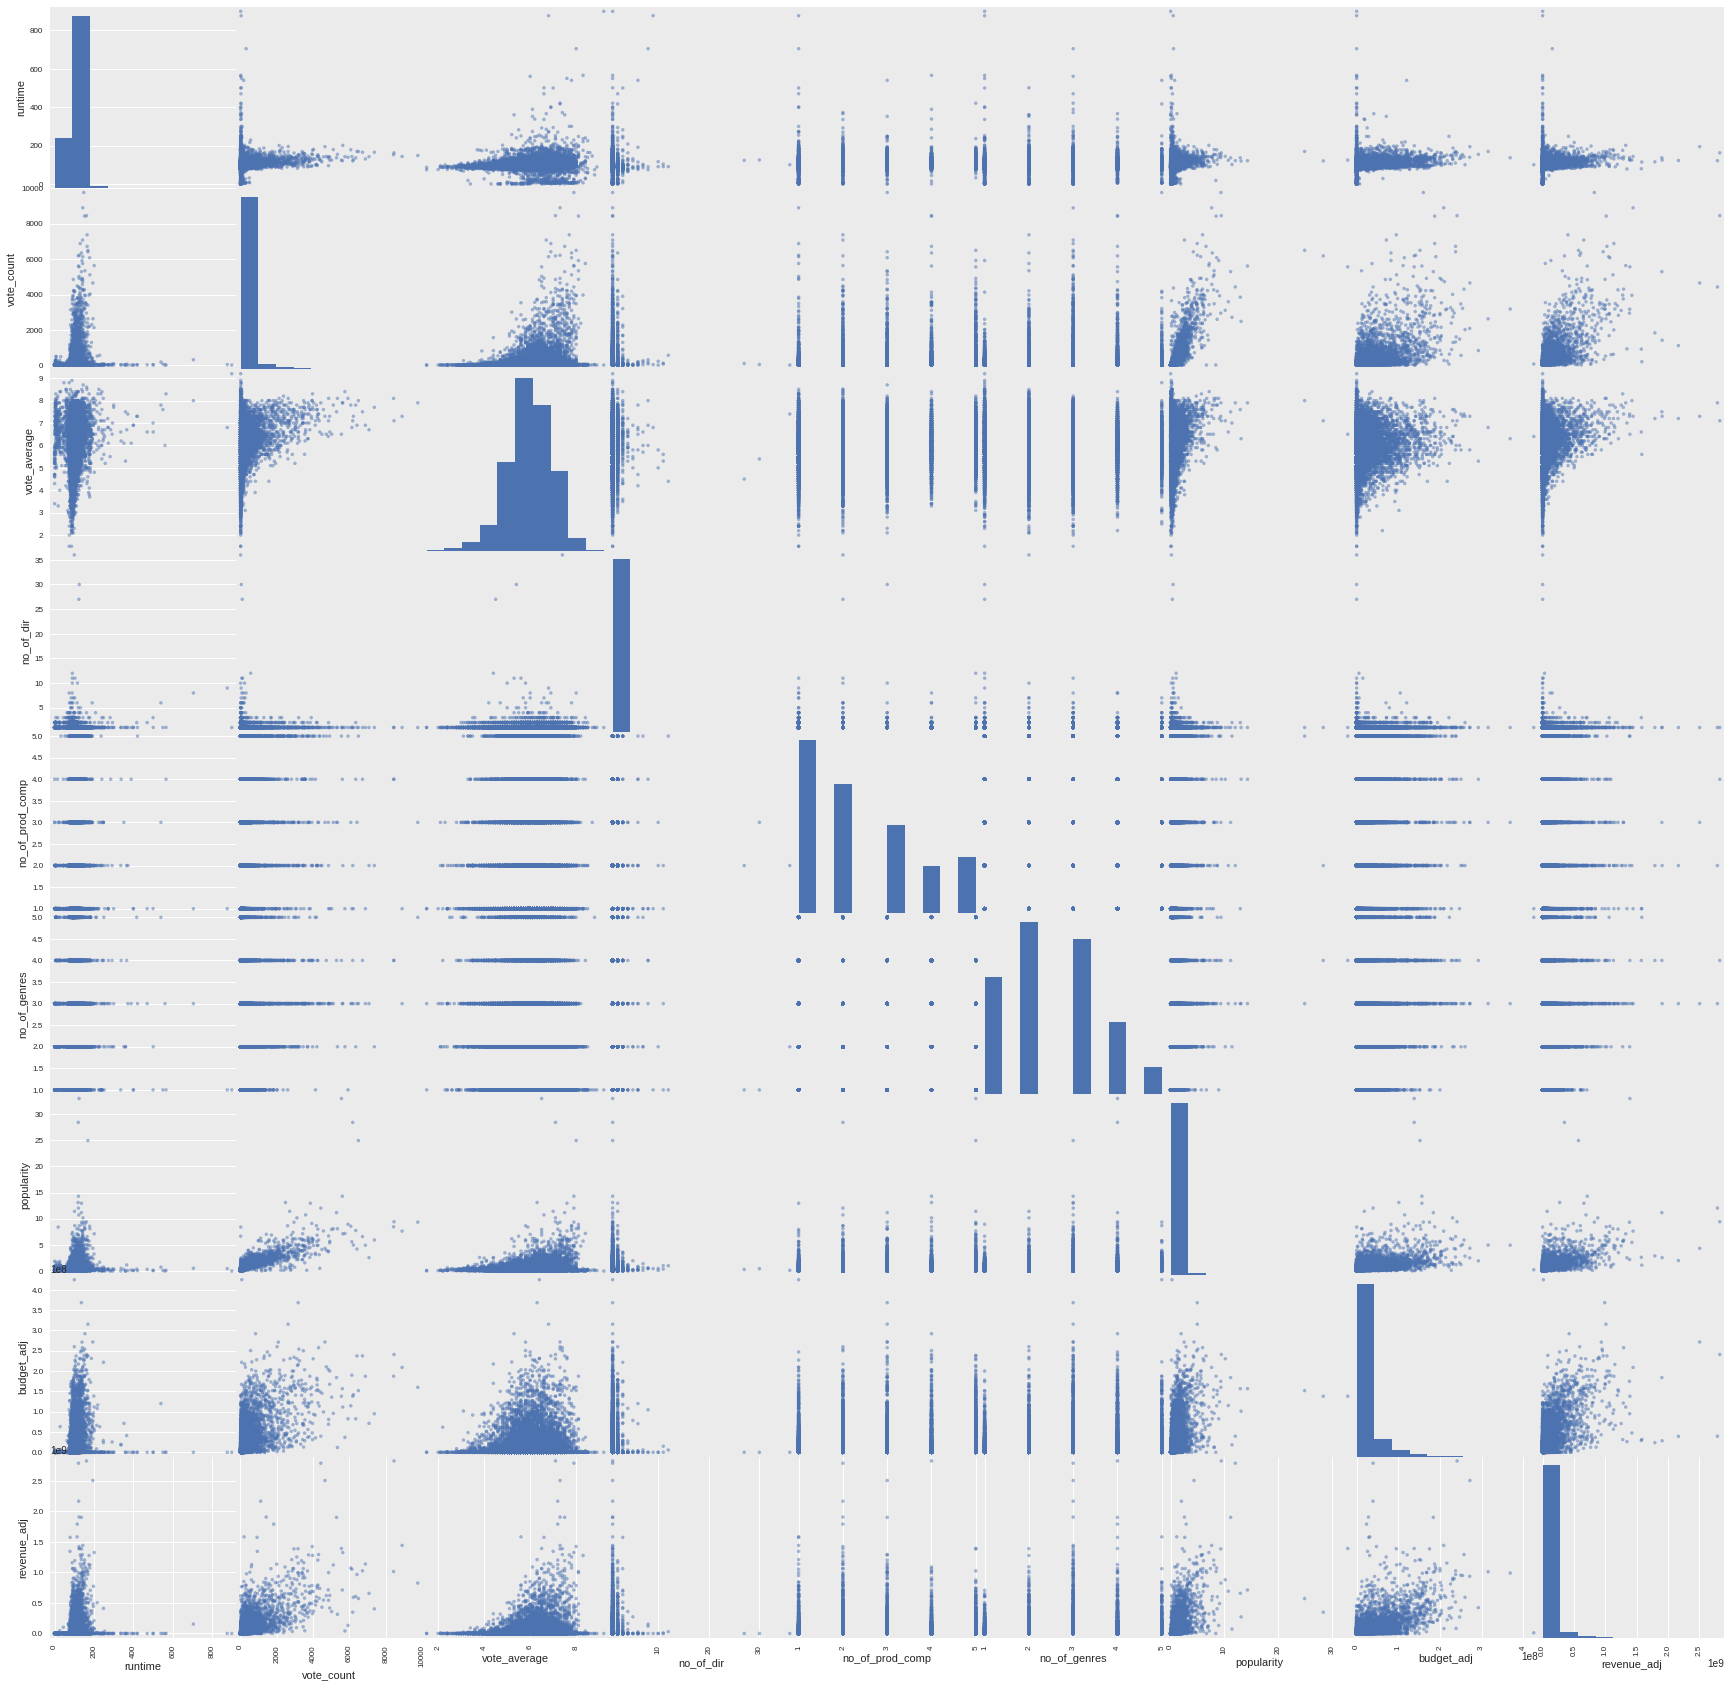

In [172]:
pd.plotting.scatter_matrix(df, figsize = (30, 30) );

From the above plot, we observe the following:

1. The `vote_average` column has a normal distribution.
1. Histogram plots of  `revenue_adj`, `budget_adj`, `popularity`, `vote_count` and `vote_average` are skewed to the right. 
2. List item



In [173]:
corr_df_cbr = df_clean_bud_rev.corr()
corr_df_cbr

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
runtime,1.000000,0.273771,0.351712,-0.090001,0.096655,0.041335,0.215092,0.333976,0.280505
vote_count,0.273771,1.000000,0.387210,0.036635,0.160226,0.124604,0.780096,0.497970,0.654688
vote_average,0.351712,0.387210,1.000000,-0.000102,-0.000019,-0.035881,0.317866,0.036803,0.266844
no_of_dir,-0.090001,0.036635,-0.000102,1.000000,-0.019525,0.034432,0.036591,0.046505,0.045541
no_of_prod_comp,0.096655,0.160226,-0.000019,-0.019525,1.000000,0.018900,0.149214,0.140956,0.015393
no_of_genres,0.041335,0.124604,-0.035881,0.034432,0.018900,1.000000,0.113140,0.279407,0.160610
popularity,0.215092,0.780096,0.317866,0.036591,0.149214,0.113140,1.000000,0.399356,0.546959
budget_adj,0.333976,0.497970,0.036803,0.046505,0.140956,0.279407,0.399356,1.000000,0.570451
revenue_adj,0.280505,0.654688,0.266844,0.045541,0.015393,0.160610,0.546959,0.570451,1.000000


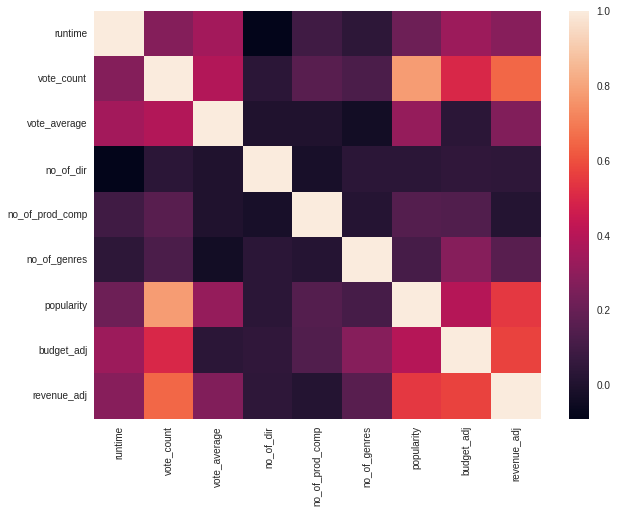

In [174]:
sns.heatmap(corr_df_cbr)

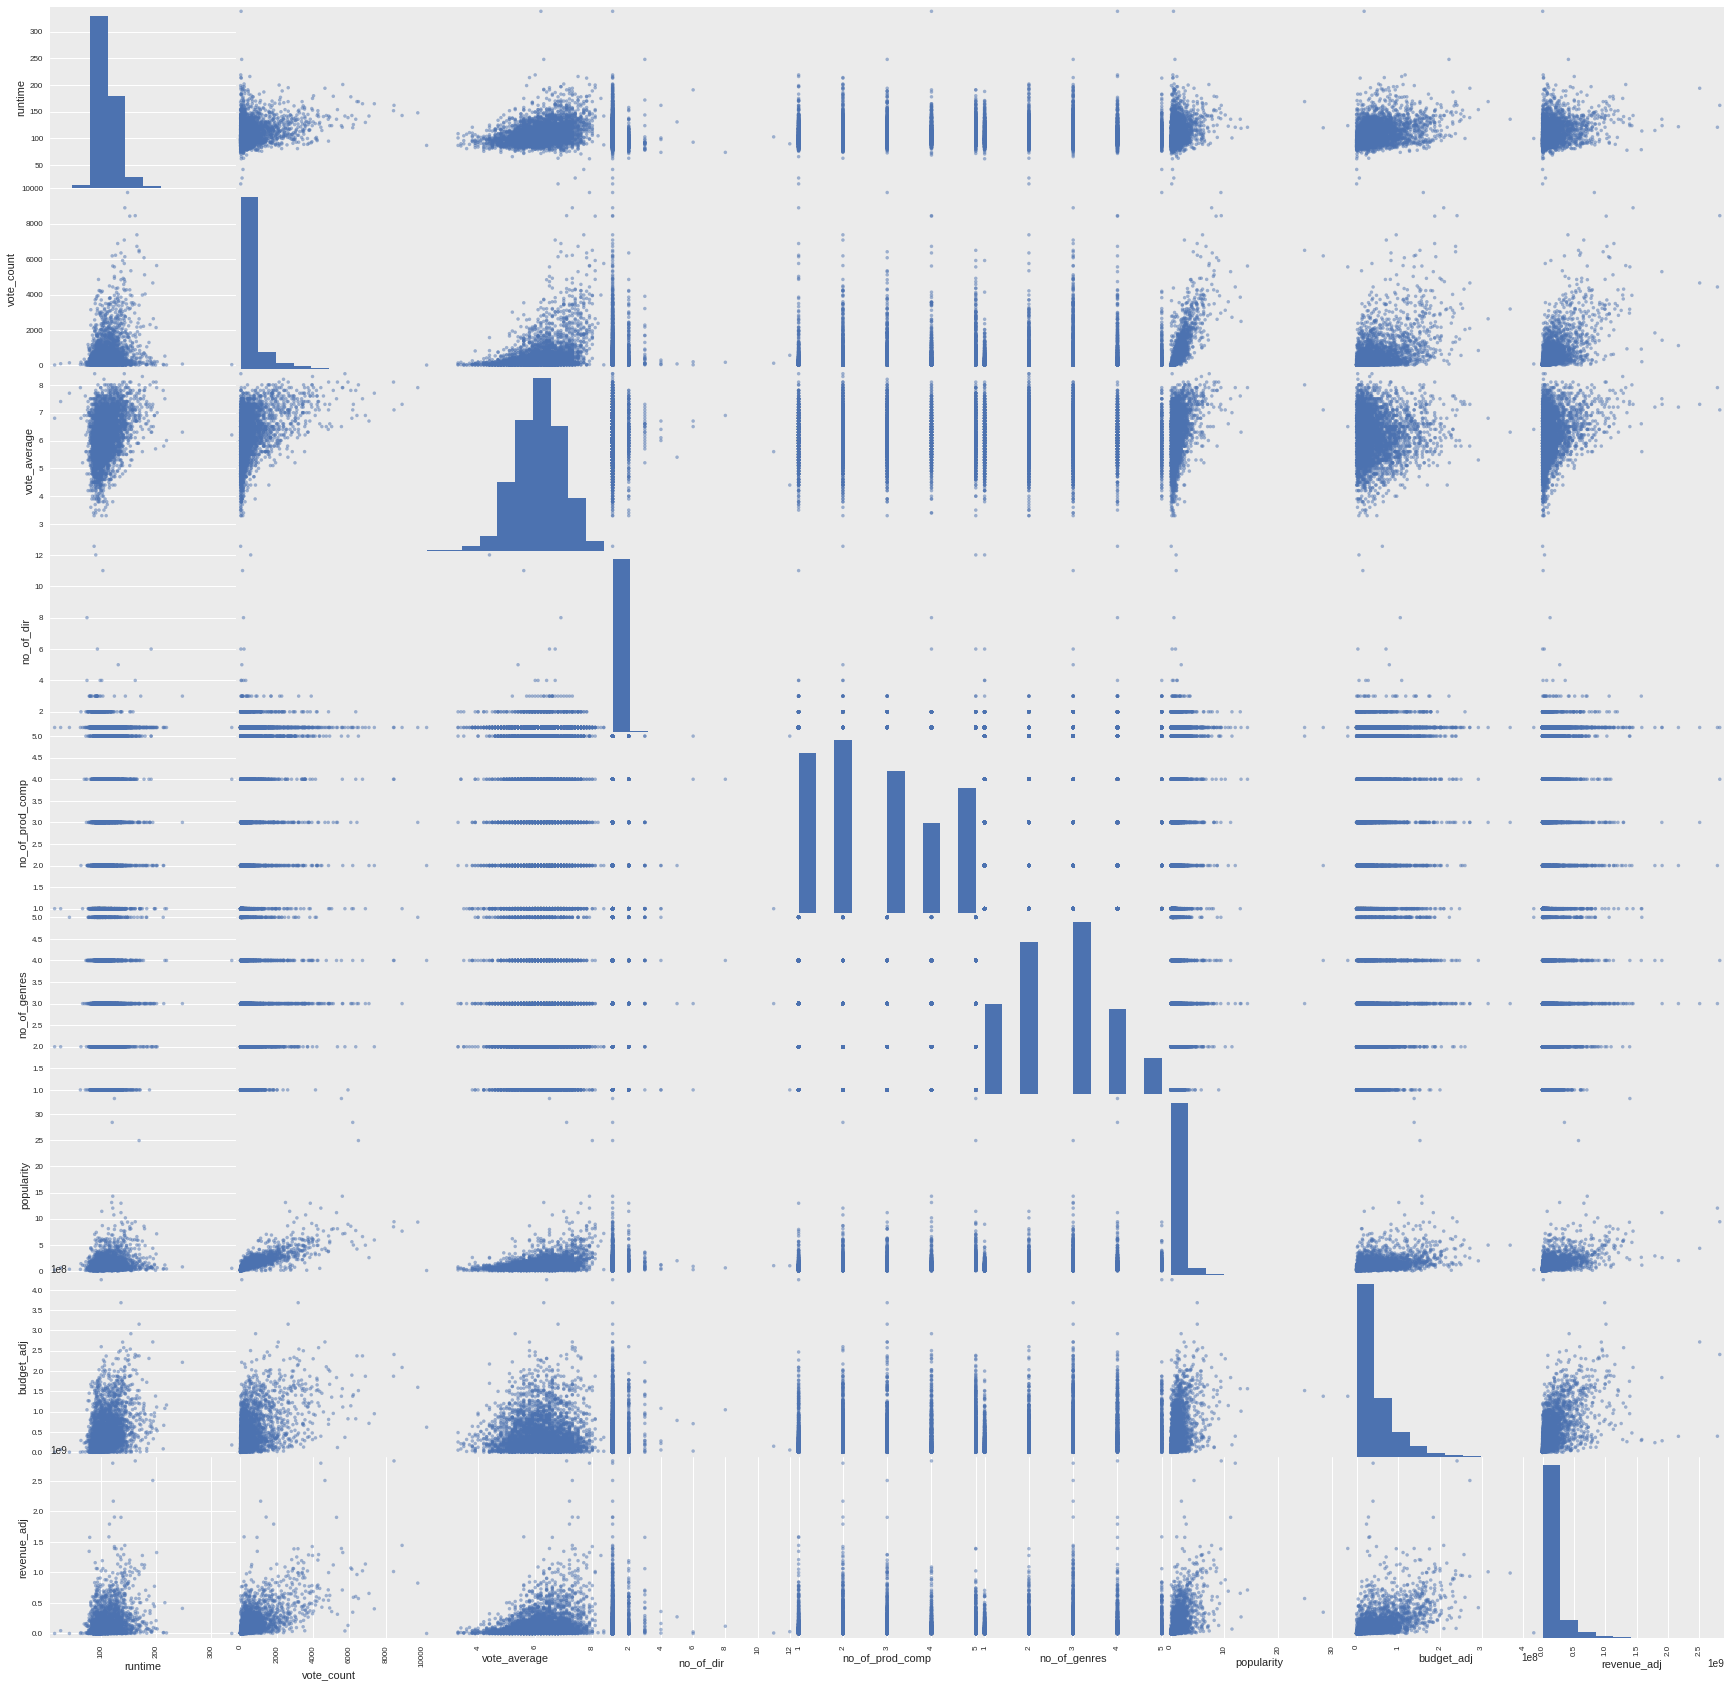

In [175]:
pd.plotting.scatter_matrix(df_clean_bud_rev, figsize = (30, 30) ); 

### In what year were movies released most? And what are the revenue generated?

In [176]:
df.release_year.unique()

array(['2015', '2014', '1977', '2009', '2010', '1999', '2001', '2008',
       '2011', '2002', '1994', '2012', '2003', '1997', '2013', '1985',
       '2005', '2006', '2004', '1972', '1980', '2007', '1979', '1984',
       '1983', '1995', '1992', '1981', '1996', '2000', '1982', '1998',
       '1989', '1991', '1988', '1987', '1968', '1974', '1975', '1962',
       '1964', '1971', '1990', '1961', '1960', '1976', '1993', '1967',
       '1963', '1986', '1973', '1970', '1965', '1969', '1978', '1966'],
      dtype=object)

In [177]:
df.release_year.value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

In [178]:
top_ten_release_year = df.release_year.value_counts()[:10]
top_ten_release_year

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: release_year, dtype: int64

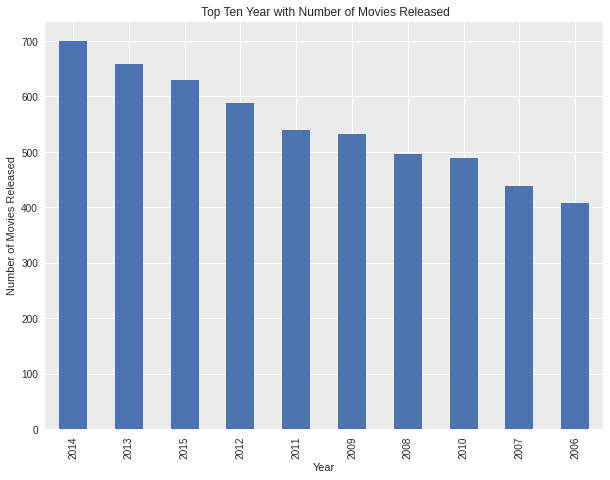

In [179]:
top_ten_release_year.plot(kind = 'bar')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Movies Released') # add y-label to the plot
plt.title(' Top Ten Year with Number of Movies Released'); # add title to the plot

From the above, 2014 seems to be the year with the highest number of movies released (700 movies in total).

For our data (i.e `df_clean_bud_rev`) which we take out where the adjusted financial variables equals zero, we try to find out the total and average profit per year.

In [180]:
adj_bud_rev = pd.DataFrame(df_clean_bud_rev.groupby('release_year')[['revenue_adj', 'budget_adj']].sum())
adj_bud_rev.head()

,revenue_adj,budget_adj
release_year,,
1960,9.511497e+08,1.534090e+08
1961,2.463622e+09,2.818516e+08
1962,1.487318e+09,2.843733e+08
1963,1.256903e+09,4.351498e+08
1964,2.310241e+09,2.385733e+08


In [181]:
adj_bud_rev['total_profit_adj'] = adj_bud_rev['revenue_adj'] - adj_bud_rev['budget_adj']
adj_bud_rev.head()

,revenue_adj,budget_adj,total_profit_adj
release_year,,,
1960,9.511497e+08,1.534090e+08,7.977407e+08
1961,2.463622e+09,2.818516e+08,2.181770e+09
1962,1.487318e+09,2.843733e+08,1.202945e+09
1963,1.256903e+09,4.351498e+08,8.217533e+08
1964,2.310241e+09,2.385733e+08,2.071668e+09


In [182]:
adj_bud_rev_mean = pd.DataFrame(df_clean_bud_rev.groupby('release_year')[['revenue_adj', 'budget_adj']].mean())
adj_bud_rev_mean['mean_profit_adj'] = adj_bud_rev_mean['revenue_adj'] - adj_bud_rev_mean['budget_adj']
adj_bud_rev_mean.head()

,revenue_adj,budget_adj,mean_profit_adj
release_year,,,
1960,1.902299e+08,3.068179e+07,1.595481e+08
1961,2.463622e+08,2.818516e+07,2.181770e+08
1962,2.124740e+08,4.062476e+07,1.718493e+08
1963,2.094838e+08,7.252496e+07,1.369589e+08
1964,3.300344e+08,3.408189e+07,2.959526e+08


In [183]:
adj_bud_rev_mean = adj_bud_rev_mean.rename(columns = {'revenue_adj' : 'revenue_adj_mean', 'budget_adj' : 'budget_adj_mean'})
adj_bud_rev_mean.head()

,revenue_adj_mean,budget_adj_mean,mean_profit_adj
release_year,,,
1960,1.902299e+08,3.068179e+07,1.595481e+08
1961,2.463622e+08,2.818516e+07,2.181770e+08
1962,2.124740e+08,4.062476e+07,1.718493e+08
1963,2.094838e+08,7.252496e+07,1.369589e+08
1964,3.300344e+08,3.408189e+07,2.959526e+08


Now we join the mean and sum dataframes.

In [184]:
adj_bud_rev_composite = adj_bud_rev_mean[['mean_profit_adj']].join( adj_bud_rev[['total_profit_adj']])
adj_bud_rev_composite = adj_bud_rev_composite.sort_values(by = 'total_profit_adj', ascending = False)
adj_bud_rev_composite.head(10)

,mean_profit_adj,total_profit_adj
release_year,,
2015,1.094348e+08,1.750957e+10
2012,9.976430e+07,1.576276e+10
2014,9.309273e+07,1.536030e+10
2013,8.207319e+07,1.477317e+10
2011,7.290796e+07,1.450868e+10
2009,8.218418e+07,1.430005e+10
2010,7.495069e+07,1.334122e+10
2007,7.448429e+07,1.228991e+10
2008,7.182521e+07,1.199481e+10


In [185]:
adj_bud_rev_composite.sort_values(by = 'mean_profit_adj', ascending = False).head(10)

,mean_profit_adj,total_profit_adj
release_year,,
1965,5.526511e+08,2.763256e+09
1973,4.328721e+08,5.194465e+09
1975,3.638568e+08,3.274711e+09
1977,3.301075e+08,6.272042e+09
1967,3.199669e+08,4.159569e+09
1969,3.074121e+08,1.229648e+09
1972,2.980356e+08,2.384285e+09
1964,2.959526e+08,2.071668e+09
1970,2.318386e+08,2.550225e+09


From the two dataframes above, we see that the year 2015 has the total amount of profit while the year 1965 has the highest mean in profit.

We focus on the `total_profit_adj` in descending order and make a bar plot for it.

In [186]:
adj_bud_rev_composite = adj_bud_rev_composite.head(10)

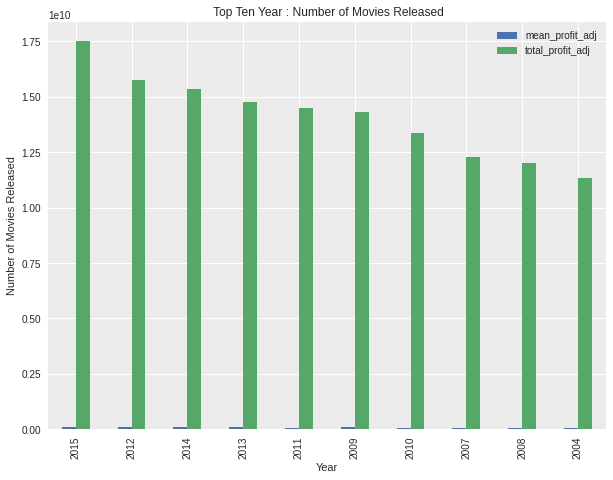

In [187]:
adj_bud_rev_composite.plot(kind = 'bar')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Movies Released') # add y-label to the plot
plt.title(' Top Ten Year : Number of Movies Released'); # add title to the plot

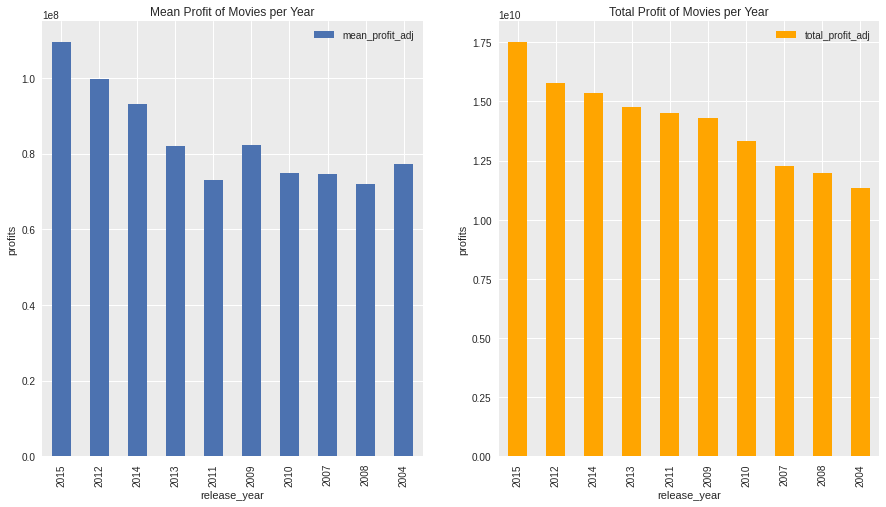

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
adj_bud_rev_composite[['mean_profit_adj']].plot(kind='bar' , ax = axes[0], title = 'Mean Profit of Movies per Year',ylabel = 'profits' )
adj_bud_rev_composite[['total_profit_adj']].plot(kind='bar', ax = axes[1], color = 'orange', title = 'Total Profit of Movies per Year',ylabel = 'profits');

### In what year were each genre of movie released the most?

In [189]:
df.isna().sum()

original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_month              0
release_year               0
runtime                    0
vote_count                 0
vote_average               0
no_of_dir                 44
no_of_prod_comp         1030
no_of_genres              23
popularity                 0
budget_adj                 0
revenue_adj                0
dtype: int64

Below, we have the top ten genres by counts in our data.

In [190]:
df.genres.value_counts()[:10]

Drama                   712
Comedy                  712
Comedy|Drama            372
Comedy|Drama|Romance    350
Drama|Romance           324
Documentary             312
Comedy|Romance          308
Horror|Thriller         306
Horror                  253
Drama|Thriller          171
Name: genres, dtype: int64

In [191]:
df.groupby(['genres', 'release_year'])['release_year'].count().head(30)
# [['genres']].count()

genres            release_year
Action            1976             1
                  1982             1
                  1985             1
                  1986             1
                  1988             1
                  1993             1
                  1994             1
                  1996             1
                  2001             1
                  2002             2
                  2003             5
                  2004             4
                  2005             5
                  2006             2
                  2007             2
                  2008             1
                  2009             3
                  2010             3
                  2011             5
                  2012             2
                  2013             3
                  2014            10
                  2015             7
Action|Adventure  1972             1
                  1980             1
                  1981             1
       

In [192]:
genres_yr_by_yr = pd.DataFrame(df.groupby(['genres', 'release_year'])['genres'].count())
genres_yr_by_yr.head(30)

genres
genres           release_year        
Action           1976               1
                 1982               1
                 1985               1
                 1986               1
                 1988               1
                 1993               1
                 1994               1
                 1996               1
                 2001               1
                 2002               2
                 2003               5
                 2004               4
                 2005               5
                 2006               2
                 2007               2
                 2008               1
                 2009               3
                 2010               3
                 2011               5
                 2012               2
                 2013               3
                 2014              10
                 2015               7
Action|Adventure 1972               1
                 1980               1
                 1981               1
                 1984               1
                 1985               1
                 1989               1
                 1990               2

In [193]:
genres_yr_by_yr = genres_yr_by_yr.rename(columns = {'genres':'genres_count'})
genres_yr_by_yr = genres_yr_by_yr.reset_index()
genres_yr_by_yr

,genres,release_year,genres_count
0,Action,1976,1
1,Action,1982,1
2,Action,1985,1
3,Action,1986,1
4,Action,1988,1
...,...,...,...
5137,Western,1977,1
5138,Western,1992,1
5139,Western,2003,1
5140,Western,2004,1


In [194]:
genres_yr_by_yr.groupby(['genres', 'release_year'])['genres_count'].max().head(30)

genres            release_year
Action            1976             1
                  1982             1
                  1985             1
                  1986             1
                  1988             1
                  1993             1
                  1994             1
                  1996             1
                  2001             1
                  2002             2
                  2003             5
                  2004             4
                  2005             5
                  2006             2
                  2007             2
                  2008             1
                  2009             3
                  2010             3
                  2011             5
                  2012             2
                  2013             3
                  2014            10
                  2015             7
Action|Adventure  1972             1
                  1980             1
                  1981             1
       

In [195]:
genres_yr_by_yr.loc[genres_yr_by_yr['genres_count'].idxmax()]

genres          Drama
release_year     2014
genres_count       72
Name: 3818, dtype: object

In [196]:
genres_yr_by_yr[genres_yr_by_yr['genres_count']==genres_yr_by_yr['genres_count'].max()]

,genres,release_year,genres_count
3818,Drama,2014,72


In [197]:
genres_yr_by_yr.nunique()

genres          1060
release_year      56
genres_count      43
dtype: int64

In [198]:
# genres_yr_by_yr.pivot(index='release_year', columns = 'genres')
pivot_genre = genres_yr_by_yr.pivot(index='genres', columns = 'release_year')
pivot_genre

genres_count                           \
release_year                                    1960 1961 1962 1963 1964 1965   
genres                                                                          
Action                                           NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure                                 NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation                       NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy                NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy|Drama          NaN  NaN  NaN  NaN  NaN  NaN   
...                                              ...  ...  ...  ...  ...  ...   
Thriller                                         1.0  NaN  NaN  NaN  NaN  1.0   
Thriller|War                                     NaN  NaN  NaN  NaN  NaN  NaN   
Thriller|Western                                 NaN  NaN  NaN  NaN  NaN  NaN   
War                                              NaN  NaN  NaN  NaN  NaN  NaN   
Western                                          NaN  1.0  1.0  NaN  NaN  NaN   

                                                                            \
release_year                            1966 1967 1968 1969 1970 1971 1972   
genres                                                                       
Action                                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure                         NaN  NaN  NaN  NaN  NaN  NaN  1.0   
Action|Adventure|Animation               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy        NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy|Drama  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                      ...  ...  ...  ...  ...  ...  ...   
Thriller                                 1.0  1.0  NaN  NaN  NaN  NaN  NaN   
Thriller|War                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Thriller|Western                         NaN  NaN  NaN  NaN  NaN  NaN  NaN   
War                                      NaN  NaN  1.0  NaN  NaN  NaN  NaN   
Western                                  2.0  1.0  1.0  NaN  1.0  2.0  1.0   

                                                                            \
release_year                            1973 1974 1975 1976 1977 1978 1979   
genres                                                                       
Action                                   NaN  NaN  NaN  1.0  NaN  NaN  NaN   
Action|Adventure                         NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy        NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy|Drama  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                      ...  ...  ...  ...  ...  ...  ...   
Thriller                                 NaN  NaN  NaN  1.0  NaN  NaN  NaN   
Thriller|War                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Thriller|Western                         NaN  NaN  NaN  NaN  NaN  NaN  NaN   
War                                      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Western                                  2.0  NaN  1.0  NaN  1.0  NaN  NaN   

                                                                            \
release_year                            1980 1981 1982 1983 1984 1985 1986   
genres                                                                       
Action                                   NaN  NaN  1.0  NaN  NaN  1.0  1.0   
Action|Adventure                         1.0  1.0  NaN  NaN  1.0  1.0  NaN   
Action|Adventure|Animation               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy        NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Action|Adventure|Animation|Comedy|Drama  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                      ...  ...  ...  ...  ...  ...  ...   
Thriller         

In [199]:
pivot_genre_count = pd.DataFrame(pivot_genre.max(axis = 1))
pivot_genre_count= pivot_genre_count.rename(columns = {0: 'count'})
pivot_genre_count

,count
genres,
Action,10.0
Action|Adventure,8.0
Action|Adventure|Animation,2.0
Action|Adventure|Animation|Comedy,1.0
Action|Adventure|Animation|Comedy|Drama,1.0
...,...
Thriller,16.0
Thriller|War,1.0
Thriller|Western,1.0


In [200]:
pivot_genre_year = pd.DataFrame(pivot_genre.idxmax(axis=1))
pivot_genre_year = pivot_genre_year.rename(columns = {0: 'year_released'})
pivot_genre_year

,year_released
genres,
Action,"(genres_count, 2014)"
Action|Adventure,"(genres_count, 2014)"
Action|Adventure|Animation,"(genres_count, 2010)"
Action|Adventure|Animation|Comedy,"(genres_count, 2009)"
Action|Adventure|Animation|Comedy|Drama,"(genres_count, 2006)"
...,...
Thriller,"(genres_count, 2014)"
Thriller|War,"(genres_count, 2010)"
Thriller|Western,"(genres_count, 2013)"


In [201]:
genre_yr_n_count = pivot_genre_year.join( pivot_genre_count )
genre_yr_n_count

,year_released,count
genres,,
Action,"(genres_count, 2014)",10.0
Action|Adventure,"(genres_count, 2014)",8.0
Action|Adventure|Animation,"(genres_count, 2010)",2.0
Action|Adventure|Animation|Comedy,"(genres_count, 2009)",1.0
Action|Adventure|Animation|Comedy|Drama,"(genres_count, 2006)",1.0
...,...,...
Thriller,"(genres_count, 2014)",16.0
Thriller|War,"(genres_count, 2010)",1.0
Thriller|Western,"(genres_count, 2013)",1.0


In [202]:
genre_yr_n_count['yr_released'] = genre_yr_n_count['year_released'].apply(lambda x: x[1])
genre_yr_n_count = genre_yr_n_count.drop(columns = 'year_released')
genre_yr_n_count.head(30)

,count,yr_released
genres,,
Action,10.0,2014
Action|Adventure,8.0,2014
Action|Adventure|Animation,2.0,2010
Action|Adventure|Animation|Comedy,1.0,2009
Action|Adventure|Animation|Comedy|Drama,1.0,2006
Action|Adventure|Animation|Comedy|Family,1.0,2000
Action|Adventure|Animation|Comedy|Fantasy,2.0,2001
Action|Adventure|Animation|Comedy|Music,1.0,2004
Action|Adventure|Animation|Crime|Science Fiction,1.0,2011


The table above gives us different movie genre and the year in which they were released most. For examples, movies that were purely classified as Action movies were produced most in 2014. In that same year, a total number of 10 `Action` movies were released.

### Which genres are most popular from year to year?

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   cast                  10789 non-null  object 
 2   director              10821 non-null  object 
 3   genres                10842 non-null  object 
 4   production_companies  9835 non-null   object 
 5   release_month         10865 non-null  object 
 6   release_year          10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  no_of_dir             10821 non-null  float64
 11  no_of_prod_comp       9835 non-null   float64
 12  no_of_genres          10842 non-null  float64
 13  popularity            10865 non-null  float64
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

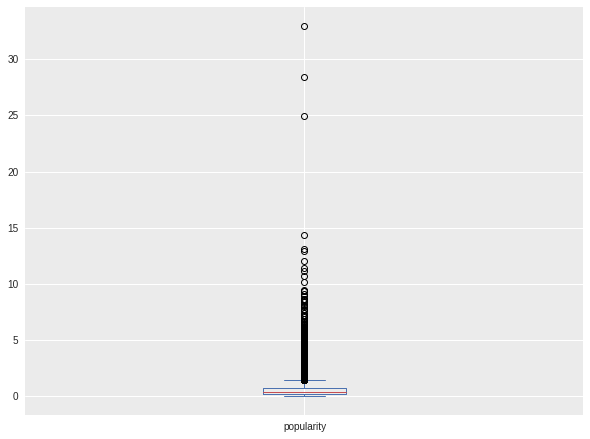

In [204]:
df['popularity'].plot(kind = 'box');

The box plot tells us that we have a lot of outliers in our `popularity` column. 

In [205]:
popularity_yr_by_yr = pd.DataFrame(df.groupby(['release_year', 'genres'])['popularity'].sum())
popularity_yr_by_yr.sort_values(by = 'popularity', ascending = False)

popularity
release_year genres                                               
2015         Action|Adventure|Science Fiction|Thriller   71.932754
2014         Drama                                       45.126157
             Comedy                                      41.062643
2015         Drama                                       35.477358
2014         Action|Adventure|Science Fiction            32.266014
...                                                            ...
2001         Comedy|Fantasy|Horror                        0.001349
2004         Documentary|Drama                            0.001315
2005         Comedy|Mystery                               0.000973
1971         Comedy|Drama|Mystery                         0.000188
1985         Drama|History|Western                        0.000065

[5142 rows x 1 columns]

In [206]:
popularity_yr_by_yr = popularity_yr_by_yr.reset_index()
popularity_yr_by_yr

,release_year,genres,popularity
0,1960,Action|Adventure|Drama|History|Western,0.310398
1,1960,Action|Adventure|Western,1.872132
2,1960,Action|Drama|Foreign|History|War,0.194948
3,1960,Action|Drama|History,1.136943
4,1960,Action|Drama|History|War,0.256779
...,...,...,...
5137,2015,Romance|TV Movie,0.133921
5138,2015,Romance|Thriller|Western,1.329702
5139,2015,Science Fiction|Thriller,2.036970
5140,2015,TV Movie,0.476341


In [207]:
pivot_popularity_yr_by_yr = popularity_yr_by_yr.pivot(index='release_year', columns = 'genres')

pivot_popularity_yr_by_yr.head(5)

popularity                                              \
genres           Action Action|Adventure Action|Adventure|Animation   
release_year                                                          
1960                NaN              NaN                        NaN   
1961                NaN              NaN                        NaN   
1962                NaN              NaN                        NaN   
1963                NaN              NaN                        NaN   
1964                NaN              NaN                        NaN   

                                                \
genres       Action|Adventure|Animation|Comedy   
release_year                                     
1960                                       NaN   
1961                                       NaN   
1962                                       NaN   
1963                                       NaN   
1964                                       NaN   

                                                      \
genres       Action|Adventure|Animation|Comedy|Drama   
release_year                                           
1960                                             NaN   
1961                                             NaN   
1962                                             NaN   
1963                                             NaN   
1964                                             NaN   

                                                       \
genres       Action|Adventure|Animation|Comedy|Family   
release_year                                            
1960                                              NaN   
1961                                              NaN   
1962                                              NaN   
1963                                              NaN   
1964                                              NaN   

                                                        \
genres       Action|Adventure|Animation|Comedy|Fantasy   
release_year                                             
1960                                               NaN   
1961                                               NaN   
1962                                               NaN   
1963                                               NaN   
1964                                               NaN   

                                                      \
genres       Action|Adventure|Animation|Comedy|Music   
release_year                                           
1960                                             NaN   
1961                                             NaN   
1962                                             NaN   
1963                                             NaN   
1964                                             NaN   

                                                               \
genres       Action|Adventure|Animation|Crime|Science Fiction   
release_year                                                    
1960                                                      NaN   
1961                                                      NaN   
1962                                                      NaN   
1963                                                      NaN   
1964                                                      NaN   

                                                      \
genres       Action|Adventure|Animation|Drama|Family   
release_year                                           
1960                                             NaN   
1961                                             NaN   
1962                                             NaN   
1963                                             NaN   
1964                                             NaN   

                                                       \
genres       Action|Adventure|Animation|Drama|Fantasy   
release_year                                            
1960                                              NaN   
1961                     

In [208]:
pivot_popularity_yr_by_yr_pop = pd.DataFrame(pivot_popularity_yr_by_yr.max(axis = 1))
pivot_popularity_yr_by_yr_pop= pivot_popularity_yr_by_yr_pop.rename(columns = {0: 'popularity'})
pivot_popularity_yr_by_yr_pop

,popularity
release_year,
1960,2.610362
1961,2.631987
1962,3.170651
1963,2.508235
1964,3.153791
1965,1.910465
1966,1.227582
1967,2.958316
1968,4.462133


In [209]:
pivot_popularity_yr_by_yr_genre = pd.DataFrame(pivot_popularity_yr_by_yr.idxmax(axis=1))
pivot_popularity_yr_by_yr_genre = pivot_popularity_yr_by_yr_genre.rename(columns = {0: 'genre'})
pivot_popularity_yr_by_yr_genre

,genre
release_year,
1960,"(popularity, Drama|Horror|Thriller)"
1961,"(popularity, Adventure|Animation|Comedy|Family)"
1962,"(popularity, Action|Adventure|Thriller)"
1963,"(popularity, Action|Adventure|Thriller)"
1964,"(popularity, Action|Adventure|Thriller)"
1965,"(popularity, Action|Adventure|Thriller)"
1966,"(popularity, Animation|Comedy|Family)"
1967,"(popularity, Comedy|Drama|Romance)"
1968,"(popularity, Adventure|Mystery|Science Fiction)"


In [210]:
genre_yr_n_pop = pivot_popularity_yr_by_yr_genre.join( pivot_popularity_yr_by_yr_pop )
genre_yr_n_pop

,genre,popularity
release_year,,
1960,"(popularity, Drama|Horror|Thriller)",2.610362
1961,"(popularity, Adventure|Animation|Comedy|Family)",2.631987
1962,"(popularity, Action|Adventure|Thriller)",3.170651
1963,"(popularity, Action|Adventure|Thriller)",2.508235
1964,"(popularity, Action|Adventure|Thriller)",3.153791
1965,"(popularity, Action|Adventure|Thriller)",1.910465
1966,"(popularity, Animation|Comedy|Family)",1.227582
1967,"(popularity, Comedy|Drama|Romance)",2.958316
1968,"(popularity, Adventure|Mystery|Science Fiction)",4.462133


In [211]:
genre_yr_n_pop['genre'] = genre_yr_n_pop['genre'].apply(lambda x: x[1])
# genre_yr_n_pop = genre_yr_n_pop.drop(columns = 'year_released')
genre_yr_n_pop

,genre,popularity
release_year,,
1960,Drama|Horror|Thriller,2.610362
1961,Adventure|Animation|Comedy|Family,2.631987
1962,Action|Adventure|Thriller,3.170651
1963,Action|Adventure|Thriller,2.508235
1964,Action|Adventure|Thriller,3.153791
1965,Action|Adventure|Thriller,1.910465
1966,Animation|Comedy|Family,1.227582
1967,Comedy|Drama|Romance,2.958316
1968,Adventure|Mystery|Science Fiction,4.462133


From the above, we have the most popular genre for every year.

### Is `popularity` and `vote_average` any way related? Does high `popularity` imply high `vote_average`?

In [212]:
corr = df.corr()
corr

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
runtime,1.000000,0.163273,0.156813,0.029158,0.130907,0.047151,0.139032,0.221127,0.175668
vote_count,0.163273,1.000000,0.253818,0.005109,0.202987,0.124480,0.800828,0.587062,0.707941
vote_average,0.156813,0.253818,1.000000,0.020586,0.037586,-0.041823,0.209517,0.093079,0.193062
no_of_dir,0.029158,0.005109,0.020586,1.000000,-0.020900,-0.005460,0.002735,-0.001191,0.004981
no_of_prod_comp,0.130907,0.202987,0.037586,-0.020900,1.000000,0.041183,0.207749,0.227344,0.114489
no_of_genres,0.047151,0.124480,-0.041823,-0.005460,0.041183,1.000000,0.130603,0.224134,0.144916
popularity,0.139032,0.800828,0.209517,0.002735,0.207749,0.130603,1.000000,0.513555,0.609085
budget_adj,0.221127,0.587062,0.093079,-0.001191,0.227344,0.224134,0.513555,1.000000,0.646627
revenue_adj,0.175668,0.707941,0.193062,0.004981,0.114489,0.144916,0.609085,0.646627,1.000000


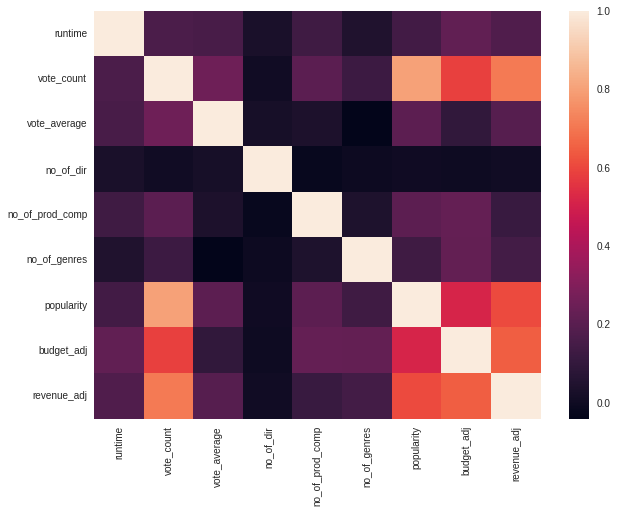

In [213]:
sns.heatmap(corr)

In [214]:
corr_df_cbr = df_clean_bud_rev.corr()
corr_df_cbr

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
runtime,1.000000,0.273771,0.351712,-0.090001,0.096655,0.041335,0.215092,0.333976,0.280505
vote_count,0.273771,1.000000,0.387210,0.036635,0.160226,0.124604,0.780096,0.497970,0.654688
vote_average,0.351712,0.387210,1.000000,-0.000102,-0.000019,-0.035881,0.317866,0.036803,0.266844
no_of_dir,-0.090001,0.036635,-0.000102,1.000000,-0.019525,0.034432,0.036591,0.046505,0.045541
no_of_prod_comp,0.096655,0.160226,-0.000019,-0.019525,1.000000,0.018900,0.149214,0.140956,0.015393
no_of_genres,0.041335,0.124604,-0.035881,0.034432,0.018900,1.000000,0.113140,0.279407,0.160610
popularity,0.215092,0.780096,0.317866,0.036591,0.149214,0.113140,1.000000,0.399356,0.546959
budget_adj,0.333976,0.497970,0.036803,0.046505,0.140956,0.279407,0.399356,1.000000,0.570451
revenue_adj,0.280505,0.654688,0.266844,0.045541,0.015393,0.160610,0.546959,0.570451,1.000000


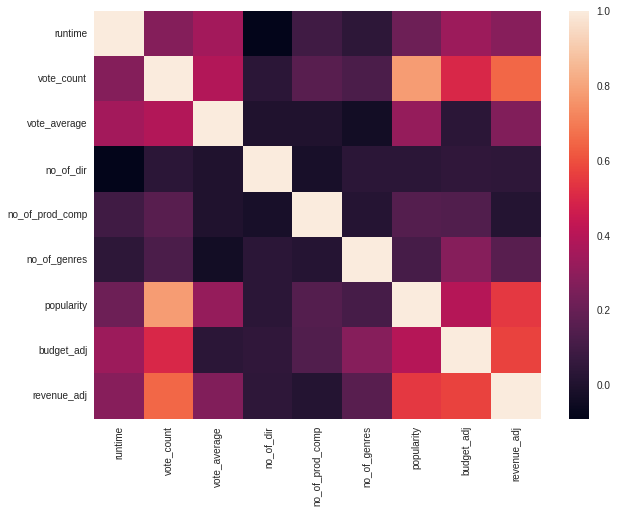

In [215]:
sns.heatmap(corr_df_cbr)

From the two datasets using varying approaches for cleaning, we see that `popularity` and `vote_average` are weakly correlated. So there is a statistical evidence that they are not strongly related. To some extent, I think this is plausible, a movie being popular or not does not stop it from being given its expected ratings by it's viewers. 

We also bear in mind that correlation does not imply causation. 

### Does the number of production company(ies)/director(s) producing a movie have an impact on the user rating i.e `vote_average`.


To see if our "_two heads are better than one kind_" idea works, we look again at our correlation plot. 

We conclude that `vote_average` is not correlated with any of  `no_of_dir` i.e `-0.000102` and `no_of_prod_comp` i.e `-0.000019`.

### What kinds of properties are associated with movies that have high revenues?

From the earlier correlation plots, we observe that `revenue_adj` is strongly positively correlated with:

* `vote_count`, `popularity`, and `budget_adj`.

On the other hand, it is weakly positively correlated with:

* `runtime`, `vote_average`, `no_of_prod_comp`, and `no_of_genres`.

Looking at this, we can advise anyone trying to make a movie to get actors who are popular as that could be a deciding factor in a movie popularity. They should also concentrate on making the movie have enough clout to generate `vote_count` and enough budget. 




### In what month of the year were movies released most? And what are the revenue generated?

In [216]:
release_months = df.release_month.value_counts()
release_months


Sep    1331
Oct    1153
Dec     985
Jan     919
Aug     918
Jun     827
Mar     822
Nov     814
May     809
Jul     799
Apr     797
Feb     691
Name: release_month, dtype: int64

Most movies were released in the month of September. 

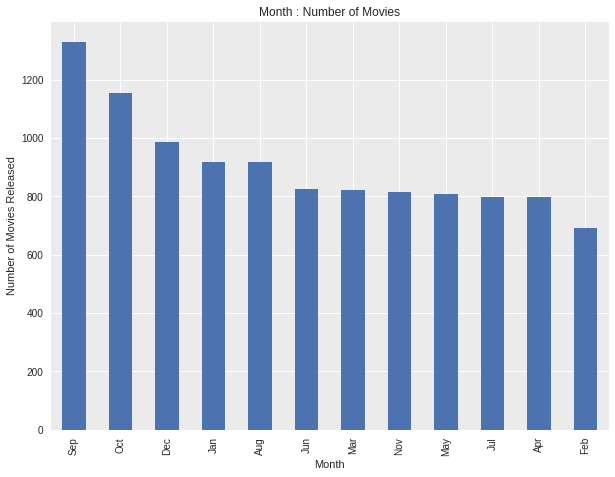

In [217]:
release_months.plot(kind = 'bar')

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('Number of Movies Released') # add y-label to the plot
plt.title('Month : Number of Movies'); # add title to the plot

For our data (i.e `df_clean_bud_rev`) which we take out where the adjusted financial variables equals zero, we try to find out the total and average profit per month.

In [218]:
adj_bud_rev = pd.DataFrame(df_clean_bud_rev.groupby('release_month')[['revenue_adj', 'budget_adj']].sum())
adj_bud_rev.head()

,revenue_adj,budget_adj
release_month,,
Apr,2.964242e+10,1.071533e+10
Aug,3.005392e+10,1.188020e+10
Dec,7.892283e+10,2.233854e+10
Feb,2.141533e+10,9.133569e+09
Jan,1.607863e+10,5.793627e+09


In [219]:
adj_bud_rev['total_profit_adj'] = adj_bud_rev['revenue_adj'] - adj_bud_rev['budget_adj']
adj_bud_rev.head()

,revenue_adj,budget_adj,total_profit_adj
release_month,,,
Apr,2.964242e+10,1.071533e+10,1.892708e+10
Aug,3.005392e+10,1.188020e+10,1.817372e+10
Dec,7.892283e+10,2.233854e+10,5.658429e+10
Feb,2.141533e+10,9.133569e+09,1.228176e+10
Jan,1.607863e+10,5.793627e+09,1.028501e+10


In [220]:
adj_bud_rev_mean = pd.DataFrame(df_clean_bud_rev.groupby('release_month')[['revenue_adj', 'budget_adj']].mean())
adj_bud_rev_mean['mean_profit_adj'] = adj_bud_rev_mean['revenue_adj'] - adj_bud_rev_mean['budget_adj']
adj_bud_rev_mean.head()

,revenue_adj,budget_adj,mean_profit_adj
release_month,,,
Apr,1.110203e+08,4.013234e+07,7.088795e+07
Aug,8.918078e+07,3.525282e+07,5.392795e+07
Dec,1.901755e+08,5.382780e+07,1.363477e+08
Feb,8.332814e+07,3.553918e+07,4.778896e+07
Jan,7.146060e+07,2.574945e+07,4.571114e+07


In [221]:
adj_bud_rev_mean = adj_bud_rev_mean.rename(columns = {'revenue_adj' : 'revenue_adj_mean', 'budget_adj' : 'budget_adj_mean'})
adj_bud_rev_mean.head()

,revenue_adj_mean,budget_adj_mean,mean_profit_adj
release_month,,,
Apr,1.110203e+08,4.013234e+07,7.088795e+07
Aug,8.918078e+07,3.525282e+07,5.392795e+07
Dec,1.901755e+08,5.382780e+07,1.363477e+08
Feb,8.332814e+07,3.553918e+07,4.778896e+07
Jan,7.146060e+07,2.574945e+07,4.571114e+07


Now we join the mean and sum dataframes.

In [222]:
adj_bud_rev_composite = adj_bud_rev_mean[['mean_profit_adj']].join( adj_bud_rev[['total_profit_adj']])
adj_bud_rev_composite = adj_bud_rev_composite.sort_values(by = 'total_profit_adj', ascending = False)
adj_bud_rev_composite

,mean_profit_adj,total_profit_adj
release_month,,
Jun,1.666797e+08,5.667111e+10
Dec,1.363477e+08,5.658429e+10
May,1.456792e+08,4.239264e+10
Nov,1.288804e+08,3.917966e+10
Jul,1.216389e+08,3.843788e+10
Mar,8.978962e+07,2.505131e+10
Oct,6.407633e+07,2.325971e+10
Apr,7.088795e+07,1.892708e+10
Aug,5.392795e+07,1.817372e+10


In [223]:
adj_bud_rev_composite.sort_values(by = 'mean_profit_adj', ascending = False)

,mean_profit_adj,total_profit_adj
release_month,,
Jun,1.666797e+08,5.667111e+10
May,1.456792e+08,4.239264e+10
Dec,1.363477e+08,5.658429e+10
Nov,1.288804e+08,3.917966e+10
Jul,1.216389e+08,3.843788e+10
Mar,8.978962e+07,2.505131e+10
Apr,7.088795e+07,1.892708e+10
Oct,6.407633e+07,2.325971e+10
Aug,5.392795e+07,1.817372e+10


From the two dataframes above, we see that the month of June has the total amount of profit. Coincidentally, June also had the highest mean in profit.

We focus on the `total_profit_adj` in descending order and make a bar plot for it.

In [224]:
adj_bud_rev_composite = adj_bud_rev_composite

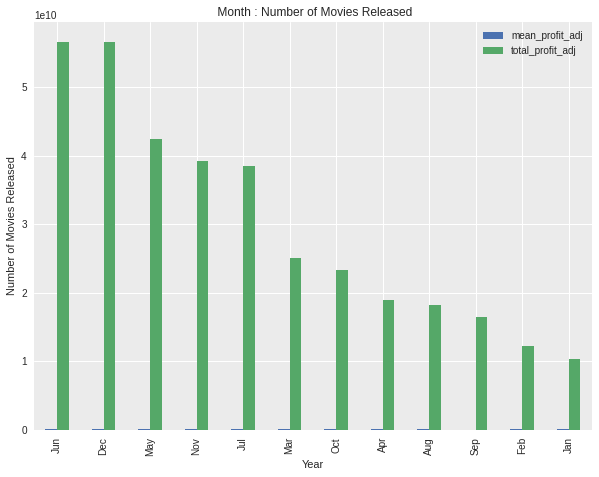

In [225]:
adj_bud_rev_composite.plot(kind = 'bar')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Movies Released') # add y-label to the plot
plt.title(' Month : Number of Movies Released'); # add title to the plot

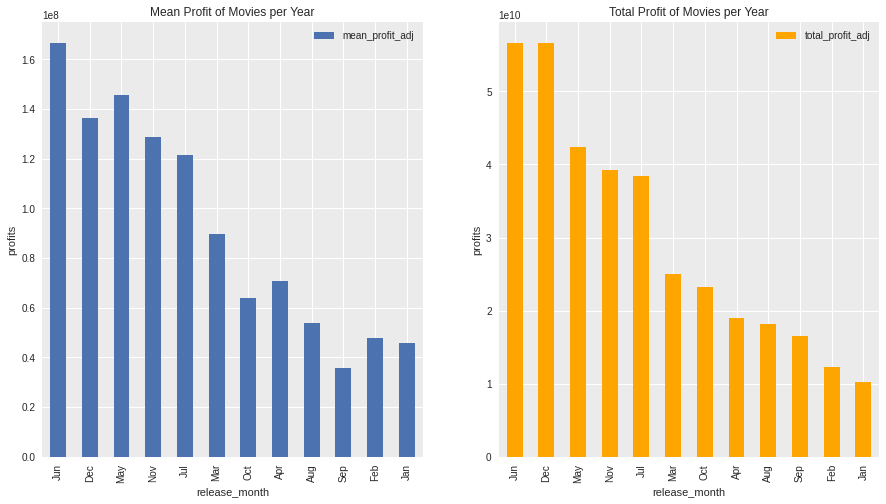

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
adj_bud_rev_composite[['mean_profit_adj']].plot(kind='bar' , ax = axes[0], title = 'Mean Profit of Movies per Year',ylabel = 'profits' )
adj_bud_rev_composite[['total_profit_adj']].plot(kind='bar', ax = axes[1], color = 'orange', title = 'Total Profit of Movies per Year',ylabel = 'profits');

### We perform simple linear regression that helps us to predict the adjusted revenue using stats_model.

In [227]:
df_clean = df_clean_bud_rev.dropna()
df_clean.head()

,original_title,cast,director,genres,production_companies,release_month,release_year,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
0,Jurassic World,Bryce Dallas Howard|Chris Pratt|Irrfan Khan|Ni...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment|Dentsu|Fuji Television Ne...,Jun,2015,124,5562,6.5,1.0,5.0,4.0,32.985763,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Charlize Theron|Hugh Keays-Byrne|Josh Helman|N...,George Miller,Action|Adventure|Science Fiction|Thriller,Kennedy Miller Productions|Village Roadshow Pi...,May,2015,120,6185,7.1,1.0,2.0,4.0,28.419936,1.379999e+08,3.481613e+08
2,Insurgent,Ansel Elgort|Kate Winslet|Miles Teller|Shailen...,Robert Schwentke,Adventure|Science Fiction|Thriller,Mandeville Films|NeoReel|Red Wagon Entertainme...,Mar,2015,119,2480,6.3,1.0,4.0,3.0,13.112507,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Adam Driver|Carrie Fisher|Daisy Ridley|Harriso...,J.J. Abrams,Action|Adventure|Fantasy|Science Fiction,Bad Robot|Lucasfilm|Truenorth Productions,Dec,2015,136,5292,7.5,1.0,3.0,4.0,11.173104,1.839999e+08,1.902723e+09
4,Furious 7,Dwayne Johnson|Jason Statham|Michelle Rodrigue...,James Wan,Action|Crime|Thriller,Dentsu|Media Rights Capital|One Race Films|Ori...,Apr,2015,137,2947,7.3,1.0,5.0,3.0,9.335014,1.747999e+08,1.385749e+09


In [228]:
model_data = df_clean.iloc[:, 7:]
model_data

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
0,124,5562,6.5,1.0,5.0,4.0,32.985763,1.379999e+08,1.392446e+09
1,120,6185,7.1,1.0,2.0,4.0,28.419936,1.379999e+08,3.481613e+08
2,119,2480,6.3,1.0,4.0,3.0,13.112507,1.012000e+08,2.716190e+08
3,136,5292,7.5,1.0,3.0,4.0,11.173104,1.839999e+08,1.902723e+09
4,137,2947,7.3,1.0,5.0,3.0,9.335014,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,131,74,7.5,1.0,1.0,1.0,0.670274,5.038511e+07,2.266436e+08
10828,128,46,6.3,1.0,1.0,2.0,0.402730,2.015404e+07,8.733419e+07
10829,120,36,6.9,1.0,2.0,2.0,0.395668,3.125892e+07,4.030809e+07
10835,182,28,7.0,1.0,3.0,5.0,0.299911,8.061618e+07,1.343603e+08


In [229]:
model_data.columns

Index(['runtime', 'vote_count', 'vote_average', 'no_of_dir', 'no_of_prod_comp',
       'no_of_genres', 'popularity', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [230]:
X = model_data.iloc[:, :-1]
X

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj
0,124,5562,6.5,1.0,5.0,4.0,32.985763,1.379999e+08
1,120,6185,7.1,1.0,2.0,4.0,28.419936,1.379999e+08
2,119,2480,6.3,1.0,4.0,3.0,13.112507,1.012000e+08
3,136,5292,7.5,1.0,3.0,4.0,11.173104,1.839999e+08
4,137,2947,7.3,1.0,5.0,3.0,9.335014,1.747999e+08
...,...,...,...,...,...,...,...,...
10822,131,74,7.5,1.0,1.0,1.0,0.670274,5.038511e+07
10828,128,46,6.3,1.0,1.0,2.0,0.402730,2.015404e+07
10829,120,36,6.9,1.0,2.0,2.0,0.395668,3.125892e+07
10835,182,28,7.0,1.0,3.0,5.0,0.299911,8.061618e+07


In [231]:
y = model_data.iloc[:, -1:]
y

,revenue_adj
0,1.392446e+09
1,3.481613e+08
2,2.716190e+08
3,1.902723e+09
4,1.385749e+09
...,...
10822,2.266436e+08
10828,8.733419e+07
10829,4.030809e+07
10835,1.343603e+08


In [232]:
# Fit regression model
results = sm.OLS(y, X).fit()

In [233]:
# Inspect the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            revenue_adj   R-squared (uncentered):                   0.662
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              930.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                        0.00
Time:                        07:13:38   Log-Likelihood:                         -77025.
No. Observations:                3805   AIC:                                  1.541e+05
Df Residuals:                    3797   BIC:                                  1.541e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

We cannot be too convinced at this point over our result, we proceed with **standardization**.

In [234]:
scaled_model_data = StandardScaler().fit_transform(model_data)
scaled_model_data_df = pd.DataFrame(scaled_model_data)
scaled_model_data_df

,0,1,2,3,4,5,6,7,8
0,0.738237,5.689911,0.415779,-0.194245,1.574673,1.173209,21.468881,2.078386,5.778388
1,0.536655,6.394948,1.173037,-0.194245,-0.554045,1.173209,18.384643,2.078386,0.965325
2,0.486260,2.202071,0.163359,-0.194245,0.865101,0.287483,8.044400,1.258441,0.612545
3,1.342982,5.384357,1.677875,-0.194245,0.155528,1.173209,6.734324,3.103316,8.130235
4,1.393377,2.730566,1.425456,-0.194245,1.574673,0.287483,5.492685,2.898330,5.747522
...,...,...,...,...,...,...,...,...,...
3800,1.091005,-0.520753,1.677875,-0.194245,-1.263617,-1.483970,-0.360389,0.126230,0.405255
3801,0.939818,-0.552440,0.163359,-0.194245,-1.263617,-0.598244,-0.541116,-0.547351,-0.236816
3802,0.536655,-0.563757,0.920617,-0.194245,-0.554045,-0.598244,-0.545886,-0.299922,-0.453558
3803,3.661172,-0.572810,1.046827,-0.194245,0.155528,2.058936,-0.610571,0.799812,-0.020075


In [235]:
scaled_model_data_df.columns = model_data.columns
scaled_model_data_df

,runtime,vote_count,vote_average,no_of_dir,no_of_prod_comp,no_of_genres,popularity,budget_adj,revenue_adj
0,0.738237,5.689911,0.415779,-0.194245,1.574673,1.173209,21.468881,2.078386,5.778388
1,0.536655,6.394948,1.173037,-0.194245,-0.554045,1.173209,18.384643,2.078386,0.965325
2,0.486260,2.202071,0.163359,-0.194245,0.865101,0.287483,8.044400,1.258441,0.612545
3,1.342982,5.384357,1.677875,-0.194245,0.155528,1.173209,6.734324,3.103316,8.130235
4,1.393377,2.730566,1.425456,-0.194245,1.574673,0.287483,5.492685,2.898330,5.747522
...,...,...,...,...,...,...,...,...,...
3800,1.091005,-0.520753,1.677875,-0.194245,-1.263617,-1.483970,-0.360389,0.126230,0.405255
3801,0.939818,-0.552440,0.163359,-0.194245,-1.263617,-0.598244,-0.541116,-0.547351,-0.236816
3802,0.536655,-0.563757,0.920617,-0.194245,-0.554045,-0.598244,-0.545886,-0.299922,-0.453558
3803,3.661172,-0.572810,1.046827,-0.194245,0.155528,2.058936,-0.610571,0.799812,-0.020075


In [236]:
X_sc = scaled_model_data_df.iloc[:, :-1]
# X_sc
y_sc = scaled_model_data_df.iloc[:, -1:]
# y_sc
# Fit regression model
results_sc = sm.OLS(y_sc, X_sc).fit()

In [237]:
# Inspect the results
print(results_sc.summary())

                                 OLS Regression Results                                
Dep. Variable:            revenue_adj   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              527.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                        0.00
Time:                        07:13:38   Log-Likelihood:                         -3977.9
No. Observations:                3805   AIC:                                      7972.
Df Residuals:                    3797   BIC:                                      8022.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

From the above results, using the **p-values**, we see that all of `vote_count`, `vote_average`, `no_of_prod_comp`, `popularity`, and `budget_adj` are strongly statistically significant in determining the revenue that a movie will generate after release.

The number of directors directing a movie does not in any way have significance on the revenue it will generate. This is also the same for the number of genres the movie resonates with. On the other hand, the runtime of a movie gives us a weak confidence (statistically speaking) regarding its impact on movie revenue.  

<a id='conclusions'></a>
## Conclusions


In this analysis, we have been able to answer the key questions posed in our research questions using some key pandas techniques. We also carried out a simple linear regression which we used to some to a conclusion regarding what determines the revenue a revenue will get.

## References

* [python/pandas: convert month int to month name](https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name)
* [12 Ways to Apply a Function to Each Row in Pandas DataFrame](https://towardsdatascience.com/apply-function-to-pandas-dataframe-rows-76df74165ee4)
* [Python Anonymous/Lambda Function](https://www.programiz.com/python-programming/anonymous-function)
*[Data Analysis with Python](https://github.com/olusegunajibola/DataAnalysisWithPython/blob/main/03_exploratory_data_analysis.ipynb)
* [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)